In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw ,ImageFont
import numpy as np
import matplotlib.pyplot as plt
import os,shutil,glob
import numpy as np
import cv2

random.seed(108)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!cp -av '/gdrive/MyDrive/platedetection/irainian car dataset/car' '/content'

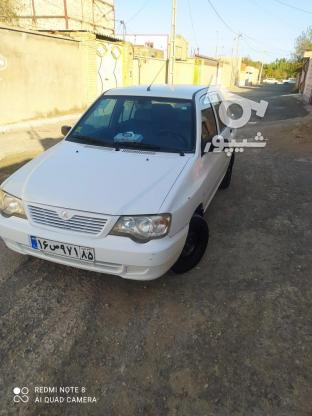

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread('/content/car/1.jpg'))

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12396, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 12396 (delta 4), reused 13 (delta 2), pack-reused 12380
Receiving objects: 100% (12396/12396), 12.18 MiB | 10.51 MiB/s, done.
Resolving deltas: 100% (8547/8547), done.


In [ ]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 4.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
cd /content/yolov5

/content/yolov5


In [ ]:
#import .yaml files for yolo
sourceaddres1='/gdrive/MyDrive/platedetection/car-persian-plate-detection/car-persian-plate-detection.yaml'
sourceaddres2='/gdrive/MyDrive/platedetection/car-plate-detection/car-plate-detection.yaml'
!cp -av '{sourceaddres1}' '/content/yolov5/data'
!cp -av '{sourceaddres2}' '/content/yolov5/data'

'/gdrive/MyDrive/platedetection/car-persian-plate-detection/car-persian-plate-detection.yaml' -> '/content/yolov5/data/car-persian-plate-detection.yaml'
'/gdrive/MyDrive/platedetection/car-plate-detection/car-plate-detection.yaml' -> '/content/yolov5/data/car-plate-detection.yaml'


In [ ]:
#import weights of two yolo networks
!cp -av '/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_plate_detection/weights' '/content'
!cp -av '/gdrive/MyDrive/platedetection/car-plate-detection/runs/train/yolo_plate_detection/weights' '/content'

'/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_plate_detection/weights' -> '/content/weights'
'/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_plate_detection/weights/last.pt' -> '/content/weights/last.pt'
'/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_plate_detection/weights/best.pt' -> '/content/weights/best.pt'
'/gdrive/MyDrive/platedetection/car-plate-detection/runs/train/yolo_plate_detection/weights/last.pt' -> '/content/weights/last.pt'
'/gdrive/MyDrive/platedetection/car-plate-detection/runs/train/yolo_plate_detection/weights/best.pt' -> '/content/weights/best.pt'


In [ ]:
!python detect.py --source /content/car  --weights /gdrive/MyDrive/platedetection/car-plate-detection/runs/train/yolo_plate_detection/weights/best.pt --conf 0.25 --name yolo_platedetection_first

detect: weights=['/gdrive/MyDrive/platedetection/car-plate-detection/runs/train/yolo_plate_detection/weights/best.pt'], source=/content/car, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_platedetection_first, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-277-gfdc9d91 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/446 /content/car/1.jpg: 640x480 1 licence, Done. (0.309s)
image 2/446 /content/car/10.jpg: 512x640 1 licence, Done. (0.323s)
image 3/446 /content/car/100.jpg: 640x480 2 licences, Done. (0.289s)
image 4/446 /content/car/101.jpg: 512x640 1 licence, Done. (0.324s)
image 5/446 /content/car/102.

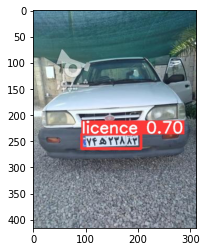

In [ ]:
detections_dir = "/content/yolov5/runs/detect/yolo_platedetection_first/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [ ]:
model1 = torch.hub.load('ultralytics/yolov5', 'custom', path='/gdrive/MyDrive/platedetection/car-plate-detection/runs/train/yolo_plate_detection/weights/best.pt')  # local model

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-7-6 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
model2 = torch.hub.load('ultralytics/yolov5', 'custom', path='/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_plate_detection/weights/best.pt')  # local model

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-7-6 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7109914 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [ ]:
def position_extractor(results):
    '''input=result of yolo network
    output=positions of bounding boxes and labels of theme'''
    positions=np.array(results.pandas().xyxy[0])
    positions=positions[positions[:, 0].argsort(kind='mergesort')]          #sort by first column (xmin)
    labels=positions[:,6]
    positions=positions[:,:4]
    positions = positions.astype(int)
    #print(positions)
    #print(labels)
    return positions,labels

def object_extractor(positions,labels,img):
    '''inputs = positions od bbx and labels of theme and input image
    output=images of in bbx'''
    objects=[]
    for i in range(len(positions)):
        objects.append(img[positions[i][1]:positions[i][3],positions[i][0]:positions[i][2],:])
        #cv2_imshow(objects[i])
        #print(labels[i])
    return objects

In [ ]:
#plot bbx on input position

#download fonts for plot bounding box and write txt label on images
!curl https://fonts.google.com/download?family=Roboto -o /content/roboto.zip ; unzip /content/roboto.zip -d /content/Roboto

def plot_bounding_box(image,positions,labels):
    #plot bbx on input position
    #output= bounding boxed image

    plotted_image = ImageDraw.Draw(image)

    for i,ann in enumerate(positions):
        obj_cls=labels[i]
        x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)), width=3)
        font = ImageFont.truetype('/content/Roboto/Roboto-BoldItalic.ttf', 30)
        plotted_image.text((x0, y0 -30),obj_cls, fill=255,font=font)

    #plt.imshow(np.array(image))
    #plt.show()
    return image

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1082k    0 1082k    0     0  6986k      0 --:--:-- --:--:-- --:--:-- 6986k
Archive:  /content/roboto.zip
  inflating: /content/Roboto/LICENSE.txt  
  inflating: /content/Roboto/Roboto-Thin.ttf  
  inflating: /content/Roboto/Roboto-ThinItalic.ttf  
  inflating: /content/Roboto/Roboto-Light.ttf  
  inflating: /content/Roboto/Roboto-LightItalic.ttf  
  inflating: /content/Roboto/Roboto-Regular.ttf  
  inflating: /content/Roboto/Roboto-Italic.ttf  
  inflating: /content/Roboto/Roboto-Medium.ttf  
  inflating: /content/Roboto/Roboto-MediumItalic.ttf  
  inflating: /content/Roboto/Roboto-Bold.ttf  
  inflating: /content/Roboto/Roboto-BoldItalic.ttf  
  inflating: /content/Roboto/Roboto-Black.ttf  
  inflating: /content/Roboto/Roboto-BlackItalic.ttf  


In [ ]:
#plate_detector_function

def plate_detector(img,imgaddress):
    #this function for each object in model1(plate license) extract objects(plate characters) of theme
    #inputs=image  and image address (image address baraye tabe plot_bounding_box ast ke dar entehaye tabe plate detector dastoor image.open ra baraye rasm bbx nias darim .. aghar bbx ra be ravesh dighar betavanim bekeshim dighad address niaz nist ya inke tasvir ra betevanim be format bad az image.open tabdil konim )
    #output= image with labels on image
    try:
        img=cv2.imread(img)
    except:
        pass
    results1 = model1(img)
    plate=[]
    positions1,labels1=position_extractor(results1)
    objects1=object_extractor(positions1,labels1,img)
    for i,ob in enumerate(objects1):
        results2 = model2(ob)
        positions2,labels2=position_extractor(results2)
        plate.append(' '.join(labels2))
        print(f'plate{i}= {plate[i]}')
        #a=object_extractor(positions2,labels2,i)


    image = Image.open(imgaddress)

    plot_bounding_box(image,positions1,plate)


    #plot_bounding_box(image, positions,labels)
    return plot_bounding_box(image,positions1,plate)

plate0= 
plate1= 9 8 d 6 9 5 8 2


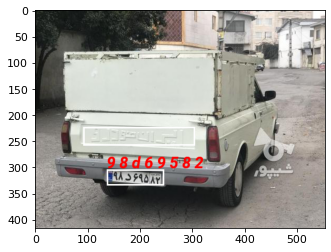

In [ ]:
#test result
img1 = '/content/car/102.jpg'
image=plate_detector(img1,img1);
plt.imshow(np.array(image))
plt.show()

In [ ]:
#function that create folder and save image in '/content/outputvideoframe'
def save_image(image,name):
    try:
        os.mkdir('/content/outputvideoframe')
        print('create outputvideoframe folder')
    except:
        pass
        #print('existoutputvideoframe')
    image.save(f'/content/outputvideoframe/{name}.jpg')

In [ ]:
#video to frame

video_address='/content/1.mp4'
vidcap = cv2.VideoCapture(video_address)
success,image = vidcap.read()
count = 0
try:
    os.mkdir('/content/videoframe')
    print('create videoframe folder')
except:
        pass
while success:
  cv2.imwrite("/content/videoframe/frame%d.jpg" % count, image)     # save frame as JPEG file
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  if success:
    image2=plate_detector(image,"/content/videoframe/frame%d.jpg" % count)
    save_image(image2,f'frame{count+10000}')
    print('write output: ', success)
  count += 1

create videoframe folder
Read a new frame:  True
plate0= 9 9 n 2 9
create outputvideoframe folder
write output:  True
Read a new frame:  True
plate0= 9 q 2 1 9 0
write output:  True
Read a new frame:  True
plate0= 9 9 4 n 2 1
write output:  True
Read a new frame:  True
plate0= 9 4 n 2 9 4 1 4 0
plate1= 
write output:  True
Read a new frame:  True
plate0= 9 4 2 4 1 5
write output:  True
Read a new frame:  True
plate0= 9 9 n 2 9 1 1 0
write output:  True
Read a new frame:  True
plate0= 9 9 4 l 2 1 1 9 1 0
write output:  True
Read a new frame:  True
plate0= 9 n 2 4 1 1 1 0
write output:  True
Read a new frame:  True
plate0= 9 4 n l 4 1 9 9 0
write output:  True
Read a new frame:  True
plate0= 9 4 n 2 1 1 4
write output:  True
Read a new frame:  True
plate0= 9 4 l 4 1 0
write output:  True
Read a new frame:  True
plate0= 9 4 n 2 1 1 1 0
write output:  True
Read a new frame:  True
plate0= 9 9 4 n 4 1 1 0
write output:  True
Read a new frame:  True
plate0= 9 9 4 n q 6 2 1 1 1 0
write output:

In [ ]:
#frame to video
import os
import moviepy.video.io.ImageSequenceClip
image_folder='/content/outputvideoframe'
fps=20  #frame per sec

image_files = [os.path.join(image_folder,img)
               for img in np.sort(os.listdir(image_folder))
               if img.endswith(".jpg")]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('/content/my_video.mp4')

[MoviePy] >>>> Building video /content/my_video.mp4
[MoviePy] Writing video /content/my_video.mp4


100%|██████████| 645/645 [00:12<00:00, 53.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/my_video.mp4 

